# Lab 6.2: Linear Regression

**Question 1**  

Using the cars data,

1) Fit a simple linear regression to predict `mpg` using `weight`.  

In [27]:
%pylab inline

import pandas as pd
import statsmodels.api as sm
import yaml

from seaborn import pairplot
from sqlalchemy import create_engine

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

cars = pd.read_sql("SELECT * FROM cars;", engine, index_col='index')

Populating the interactive namespace from numpy and matplotlib


In [28]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
index,,,,,,,,,
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [29]:
X = cars.weight
X = sm.add_constant(X)
y = cars.mpg

model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Tue, 04 Oct 2016   Prob (F-statistic):          2.97e-103
Time:                        15:04:22   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         46.3174      0.795     58.243      0.000        44.754    47.881
weight        -0.0077      0.000    -29.814      0.000        -0.008    -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# mpg  = 46.31 -.0077*weight

In [30]:
import seaborn as sns

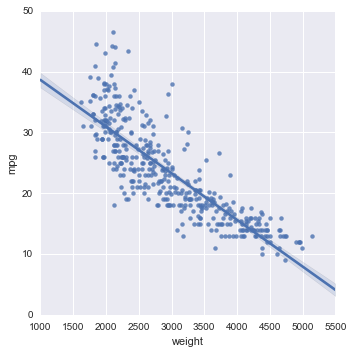

In [31]:
sns.lmplot('weight','mpg',data=cars);

2) Comment on the model fit.  

In [32]:
# Our R^2 is 0.693 which means that 69.3% of the variance of the model is explained by our model.

3) Interpret the model. 

Model interpretation?
Holding weight constant, we would expect mpg to decrease by 0.047 as horsepower goes up by 1.
Holding horsepower constant, we would expect mpg to decrease by 0.006 as weight increases by 1.
What does the intercept mean here?

 - With weight at 0 ,we would expect our MPG for a car to be 46.21. 
 - With each pound increase in weight, MPG decreasese by .0076.
 

4) Is `weight` useful for predicting `mpg`? Carry out a formal hypothesis test to show it.  

5) Make a prediction for the average `mpg` of all cars that have a weight of 2000.  

In [33]:
mpg(2000)


31.01

In [34]:
results.predict([1,2000])

array([ 30.96414429])

6) Make a prediction for a particular car that has a weight of 2000.  

In [35]:
results.predict([1,2000])

array([ 30.96414429])

7) Write a Python function to calculate the confidence interval for your prediction in part 5).  

In [36]:
x = cars.weight
se = sqrt(results.mse_resid)
b0, b1 = results.params

x_new = 2000

def confidence_se(s_e, x, x_new):
    mean_x = x.mean()
    var_x = x.var()
    n = len(x)
    return s_e * (1/n + (x_new - mean_x)**2 / ((n - 1) * var_x))**0.5

sign = array([-1., 1.])
b0 + b1 * x_new + sign * 1.96 * confidence_se(se, x, x_new)

array([ 30.31449246,  31.61379612])

8) Write a Python function to calculate the prediction interval for your prediction in part 6).  

In [37]:
def prediction_se(s_e, x, x_new):
    mean_x = x.mean()
    var_x = x.var()
    n = len(x)
    return s_e * (1 + 1/n + (x_new - mean_x)**2 / ((n - 1) * var_x))**0.5

b0 + b1 * x_new + sign * 1.96 * prediction_se(se, x, x_new)

array([ 22.42392803,  39.50436055])

9) What are the differences between the intervals you found in parts 7) and 8)?

**Question 2**  

You are shopping for a laptop computer at Best Buy. To help you with your decision, you decide to construct a regression model to predict the selling price of the laptop. The table `laptops` provides the following data for a random sample of laptops on Best Buy’s Web site:  

* Selling price
* Brand
* Screen size (in.)
* Hard drive size (GB)
* Amount of RAM memory (GB)
* Number of USB ports
* Weight (oz.) 

a) Using multiple regression, model selling price using the variables screen size, hard drive size, amount of ram, number of usb ports and weight.  

In [79]:
%pylab inline

import pandas as pd
import statsmodels.api as sm
import yaml

from seaborn import pairplot
from sqlalchemy import create_engine

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

laptops_df = pd.read_sql("SELECT * FROM laptops;", engine)

Populating the interactive namespace from numpy and matplotlib


In [80]:
laptops_df.head()

,Price ($),Screen Size (in.),RAM Memory (GB),Hard drive (GB),USB Ports,Brand,Weight (oz.)
0,830,13.3,4,500,3,Toshiba,4.9
1,750,13.3,4,640,3,Toshiba,3.2
2,1200,11.6,2,128,2,Apple,2.3
3,1600,18.4,6,640,4,Toshiba,9.7
4,1900,18.4,8,500,4,Toshiba,9.7


In [81]:
X2 = laptops_df[['Screen Size (in.)', 'Hard drive (GB)','RAM Memory (GB)','USB Ports','Weight (oz.)']]
X2 = sm.add_constant(X2)
y2 = laptops_df['Price ($)']

model2 = sm.OLS(y2, X2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price ($)   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1.514
Date:                Wed, 05 Oct 2016   Prob (F-statistic):              0.200
Time:                        14:32:01   Log-Likelihood:                -477.99
No. Observations:                  63   AIC:                             968.0
Df Residuals:                      57   BIC:                             980.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const               761.4987    946.954      0.804      0.425     -1134.744  2657.741
Screen Size (in.)     4.1113     96.206      0.043      0.966      -188.539   196.761
Hard drive (GB)       0.6561      0.459      1.429      0.159        -0.263     1.576
RAM Memory (GB)      12.8642     74.411      0.173      0.863      -136.141   161.870
USB Ports          -206.5346    123.563     -1.671      0.100      -453.965    40.896
Weight (oz.)         51.6251     99.210      0.520      0.605      -147.040   250.290
==============================================================================
Omnibus:                        9.835   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.384
Skew:                           0.993   Prob(JB):                      0.00556
Kurtosis:                       3.102   Cond. No.                     8.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> $price = 761.49 + 4.11 * screen-size + .6561 * Hard-drive + 12.86 *RAM + -206.5*USB Ports + 51.62 * Weight $

b) Perform and interpret the overall F test.  

> The overall f-test is 1.514 with a p-value of .20. This means that with a null hypothesis that our coefficients for each varaible are equal to zero. WIth an overall p-value of .20 (which is less than an alpha .05) we fail to reject our null that all of our coefficients are different from zero. This means that there is at least one coefficient that should be zero, but we do not know how many or which ones fall into this category.

c) Using p-values, which variables appear to be needed in the model? Justify your answer.   

>USB ports have a p-value of .10 . Therefore, with an alpha of .10 this would be the only variable that we keep.

d) Now create a new predictor that contains random numbers drawn from your favorite distribution, and include this predictor in your multiple regression model. Comment on the model fit. How does the new $R^2$ compare to the one in part a)?  

In [54]:
from scipy import stats
random_data = stats.norm().rvs(63)
laptops_df['random']=random_data

In [55]:
X3 =laptops_df[['Screen Size (in.)', 'Hard drive (GB)','RAM Memory (GB)','USB Ports','Weight (oz.)','random']]
X3 = sm.add_constant(X3)
y3 = laptops_df['Price ($)']

model3 = sm.OLS(y3, X3)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price ($)   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.278
Date:                Tue, 04 Oct 2016   Prob (F-statistic):              0.282
Time:                        15:22:43   Log-Likelihood:                -477.88
No. Observations:                  63   AIC:                             969.8
Df Residuals:                      56   BIC:                             984.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const               805.9954    958.704      0.841      0.404     -1114.520  2726.511
Screen Size (in.)     1.1101     97.112      0.011      0.991      -193.429   195.650
Hard drive (GB)       0.6198      0.469      1.321      0.192        -0.320     1.560
RAM Memory (GB)      19.6540     76.427      0.257      0.798      -133.449   172.756
USB Ports          -211.8509    124.989     -1.695      0.096      -462.235    38.533
Weight (oz.)         52.0141     99.914      0.521      0.605      -148.137   252.165
random               26.9215     59.574      0.452      0.653       -92.420   146.263
==============================================================================
Omnibus:                        9.576   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               10.147
Skew:                           0.983   Prob(JB):                      0.00626
Kurtosis:                       3.044   Cond. No.                     8.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>Our r^2 increases from 11.7% to 12.0% with the addition our of random data. This mean our model does a better job of explaining the data than before.

e) Generate another new predictor - you can draw another list of random numbers from the same distribution as above, or you can draw from a different distribution. Add this predictor to the model in part d). What happends to the $R^2$? Does this mean that the new predictor is useful for predicting laptop prices?

In [59]:
stats.poisson(761).rvs(63)
laptops_df['random_poisson'] = stats.poisson(761).rvs(63)

In [60]:
X4 =laptops_df[['Screen Size (in.)', 'Hard drive (GB)','RAM Memory (GB)','USB Ports','Weight (oz.)','random','random_poisson']]
X4 = sm.add_constant(X4)
y4 = laptops_df['Price ($)']

model4 = sm.OLS(y4, X4)
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price ($)   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.194
Date:                Tue, 04 Oct 2016   Prob (F-statistic):              0.321
Time:                        15:31:15   Log-Likelihood:                -477.46
No. Observations:                  63   AIC:                             970.9
Df Residuals:                      55   BIC:                             988.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const              -922.0177   2240.830     -0.411      0.682     -5412.740  3568.705
Screen Size (in.)    14.9772     98.695      0.152      0.880      -182.811   212.765
Hard drive (GB)       0.6347      0.471      1.348      0.183        -0.309     1.578
RAM Memory (GB)      17.9090     76.640      0.234      0.816      -135.682   171.500
USB Ports          -212.3546    125.295     -1.695      0.096      -463.451    38.742
Weight (oz.)         33.1833    102.557      0.324      0.747      -172.346   238.712
random               18.5570     60.518      0.307      0.760      -102.723   139.837
random_poisson        2.1362      2.503      0.854      0.397        -2.879     7.151
==============================================================================
Omnibus:                        9.522   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.127
Skew:                           0.982   Prob(JB):                      0.00632
Kurtosis:                       3.017   Cond. No.                     3.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>Our R^2 again increases with the addition of random data from out Poisson distribution. This does NOT mean that this new variable is useful for predicting values of price because our p-values are much greater than alpha (typically .05). Also, the adjusted R^2 decreases for every random variable that we add.

**Question 3**  

Squirt Squad is a cleaning service that sends crews to residential homes on either a once-a-month or twice-a-month schedule, depending on the customer’s preference. The owner would like to predict the amount of time required to clean a house based on the square footage of the house, the total number of rooms in the house, the number of bathrooms it has, the size of the cleaning crew, the frequency of the cleaning schedule, and whether or not the household has children. Data can be found in the tables **`squad`** (containing `squad_id`, `home_id`, `crew` and `freq` (0: once-a-month, 1: twice-a-month); **`squad_homes`** (containing `home_id`, `footage`, `rooms`, `baths` and `children` (Squirt Squad assumes the number of children in a house will never change. BONUS: how would you change the schema to account for the possibility that it will?)); and **`squad_times`** (containing `squad_id` and `dt`, `time` and `crew` (redundant with `squad` but included in case the squad size changes)). You will need to construct a three-way join using `home_id` and `squad_id`.

a) Construct a regression model using all of the independent variables.  

In [72]:
%pylab inline

import pandas as pd
import statsmodels.api as sm
import yaml

from seaborn import pairplot
from sqlalchemy import create_engine

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine= create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

squirt_total_df = pd.read_sql("SELECT squad.squad_id,squad.home_id,squad.crew,squad.freq, squad_homes.footage,\
                            squad_homes.rooms, squad_homes.baths,squad_homes.children,squad_times.time FROM squad \
                            JOIN  squad_times ON squad.squad_id = squad_times.squad_id  \
                            JOIN squad_homes ON squad_homes.home_id = squad.home_id ;", engine)

Populating the interactive namespace from numpy and matplotlib


In [76]:
squirt_total_df.describe()

,squad_id,home_id,crew,freq,footage,rooms,baths,children,time
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,35.679856,34.679856,2.917266,0.611511,2388.823741,10.895683,3.215827,0.428058,150.017986
std,20.574467,20.574467,0.615964,0.488286,434.967464,2.212513,0.880085,0.495690,27.716780
min,1.000000,0.000000,2.000000,0.000000,1548.000000,7.000000,1.500000,0.000000,66.000000
25%,18.000000,17.000000,3.000000,0.000000,2159.000000,9.000000,2.500000,0.000000,133.250000
50%,35.500000,34.500000,3.000000,1.000000,2341.500000,11.000000,3.000000,0.000000,150.000000
75%,53.000000,52.000000,3.000000,1.000000,2597.000000,13.000000,4.000000,1.000000,167.000000
max,70.000000,69.000000,4.000000,1.000000,3517.000000,15.000000,4.500000,1.000000,241.000000


In [74]:
#square footage of the house, the total number of rooms in the house, 
#the number of bathrooms it has, the size of the cleaning crew, 
#the frequency of the cleaning schedule, and whether or not the household has children

In [75]:
X5 = squirt_total_df[['crew','freq','footage','rooms','children','baths']]
X5 = sm.add_constant(X5)
Y5 = squirt_total_df['time']


model5 = sm.OLS(Y5,X5)
results5=model5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     44.51
Date:                Tue, 04 Oct 2016   Prob (F-statistic):           1.02e-37
Time:                        15:54:00   Log-Likelihood:                -1222.2
No. Observations:                 278   AIC:                             2458.
Df Residuals:                     271   BIC:                             2484.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        143.5146     10.950     13.106      0.000       121.956   165.073
crew         -15.4141      2.026     -7.609      0.000       -19.402   -11.426
freq          -4.0902      2.621     -1.561      0.120        -9.250     1.070
footage       -0.0048      0.006     -0.772      0.441        -0.017     0.007
rooms          6.7580      1.238      5.457      0.000         4.320     9.196
children      22.8734      2.618      8.738      0.000        17.720    28.027
baths         -5.6072      3.247     -1.727      0.085       -12.000     0.786
==============================================================================
Omnibus:                        3.347   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.188   Jarque-Bera (JB):                3.313
Skew:                          -0.148   Prob(JB):                        0.191
Kurtosis:                       3.446   Cond. No.                     2.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

b) Test and interpret the significance of the overall regression model (what is the result of the overall F test)?  

> 1.02e-37 is the p-value of our f -statistic  which means that we can reject our null that our coefficients are equal to zero.

c) Interpret the meaning of the regression coefficient for the Rooms, Crew, Children, and Frequency variables.  

> rooms:6.7580,  for each additional room it will take an additional 6.7 minutes to clean.

> crew	-15.4141, for each additional crew member the time it will take to clean a house will decrease by 15.4 minutes

> children	22.8734 : For each additional child, the time it will take to clean the house increases by 22.8 minutes

> Frequency: freq	-4.0902. If a home is cleaned twice a month, it will take 4 minutes shorter to clean the room.

d) Using the p-values, identify which independent variables are significant (needed).  

In [77]:
# Using an alpha of .05, children rooms and crew are needed.

e) Construct a regression model using only the significant variables found in part d) and predict the average time to clean a house that has 2,250 square feet, 11 total rooms, 3.5 bathrooms, and no children. This house is cleaned once a month with a crew of four employees.  

In [ ]:
X6 = squirt_total_df[['crew','freq','footage','rooms','children','baths']]
X6 = sm.add_constant(X6)
Y6 = squirt_total_df['time']


model6 = sm.OLS(Y6,X6)
results5=model5.fit()
results5.summary()

f) Compare the two models you fitted, which one is a better model? Why?

In [82]:
BONUS: how would you change the schema to account for the possibility that it will?

Object `will` not found.


In [ ]:
BONUS: how would you change the schema to account for the possibility that it will

>BONUS: how would you change the schema to account for the possibility that it will

 Create a child table with house_id that you can update with the number of children. dt from should 

In [83]:
homer_df = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/homer.csv')

In [84]:
X1 = homer_df[['x1','x2','x3','x4','x5','x6']]
X1 = sm.add_constant(X1)
y1 = homer_df['y']

X1.head()


,const,x1,x2,x3,x4,x5,x6
0,1,-0.023816,-0.012885,0.045936,-0.182890,0.028694,-0.81119
1,1,0.018453,0.058999,-0.072399,0.008679,-0.084344,-0.24208
2,1,0.054999,0.131770,-0.067223,0.202430,0.127060,0.63388
3,1,-0.018933,-0.010875,-0.028255,0.017912,0.084330,0.66062
4,1,-0.000877,0.066941,-0.048190,0.064742,0.147880,0.26643


In [87]:
model1= sm.OLS(y1,X1)
results1= model1.fit()

results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 05 Oct 2016   Prob (F-statistic):                nan
Time:                        14:37:15   Log-Likelihood:                    nan
No. Observations:                6057   AIC:                               nan
Df Residuals:                    6050   BIC:                               nan
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const             nan        nan        nan        nan           nan       nan
x1                nan        nan        nan        nan           nan       nan
x2                nan        nan        nan        nan           nan       nan
x3                nan        nan        nan        nan           nan       nan
x4                nan        nan        nan        nan           nan       nan
x5                nan        nan        nan        nan           nan       nan
x6                nan        nan        nan        nan           nan       nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         32.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""